In [14]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict,Annotated
from langchain_openai import ChatOpenAI
from pydantic import BaseModel, Field
from dotenv import load_dotenv
import operator

In [15]:
load_dotenv()

True

In [16]:
model = ChatOpenAI(model_name='gpt-4o-mini')

In [17]:
class evaluationSchema(BaseModel):
    feedback: str = Field(description='Detailed feedback on the given essay')
    score : int = Field(description='Score from 0 to 10 based on the quality of the essay', ge=0, le=10)
    

In [18]:
structured_model = model.with_structured_output(evaluationSchema)

In [19]:
essay = """The Role of Artificial Intelligence (AI) in Bangladesh
Introduction

Artificial Intelligence (AI) refers to technologies that allow machines or software to perform tasks which typically require human intelligence — such as learning, reasoning, perception, language understanding, planning, etc. Globally, AI is transforming how people live, work, and solve complex problems. In Bangladesh, AI is increasingly seen not just as a futuristic idea, but as a powerful tool that can drive development across many sectors. However, realizing AI’s full potential involves overcoming challenges in infrastructure, regulation, human capacity, and inclusion.

Current State of AI in Bangladesh

Bangladesh has already taken several steps toward integrating AI into its national development agenda. Key strategic documents like the National Strategy for Artificial Intelligence (2020) reflect the government’s intent to harness AI in governance, industry, agriculture, healthcare, finance, education, and more. 
Digital Watch Observatory

Some real-world uses are:

Healthcare: AI-assisted diagnostics, such as AI-powered chest X-rays for tuberculosis screening, have been used in rural clinics. 
Nucamp
+2
EyeNews.news
+2

Finance & Banking: Use of AI for fraud detection, risk analysis, credit scoring (especially using alternative data), and chatbot services are growing. 
LightCastle Partners
+2
EyeNews.news
+2

Agriculture: Tools that predict crop disease, optimize irrigation and fertilizer use, or otherwise assist farmers with data-driven advice are being deployed. 
EyeNews.news
+2
Dhaka AI
+2

Government & Public Services: Data-driven policy making, dashboards for monitoring development indicators, and digital transformation efforts are underway. 
Complete AI Training
+3
A2I
+3
Digital Watch Observatory
+3

Opportunities

AI presents many opportunities for Bangladesh, if implemented thoughtfully:

Boosting Productivity & Efficiency
Automating repetitive or time-consuming tasks in manufacturing, textile (garment) industry, logistics, and customer service can reduce costs, errors and speed up operations. 
EyeNews.news
+2
TAQ
+2

Financial Inclusion
Many people who lack formal credit histories or live in underserved areas may be excluded by traditional banking. AI systems can use alternative data (phone usage, transaction patterns, etc.) to assess risk and enable access to micro-loans or financial services. 
LightCastle Partners
+1

Healthcare Access and Quality
AI-driven diagnostic tools, telemedicine, disease surveillance and predictive modeling can help reach rural and remote populations, where doctors and medical infrastructure are scarce. 
Nucamp
+1

Agriculture & Food Security
AI can help maximize yield, reduce loss from pests and disease, optimize use of inputs like water and fertilizer, and help plan for climate-related risks. As agriculture remains a key sector, this can have big implications for livelihoods and national food security. 
EyeNews.news
+1

Smart Governance
Through AI, government services can be made more responsive, transparent, and efficient. Data dashboards, predictive analytics, fraud detection in public services, AI chatbots for citizen queries — all can help improve governance. 
The Business Standard
+3
A2I
+3
Digital Watch Observatory
+3

Education and Skills Development
AI tools can help personalize learning, support educators with analytics, and equip young people with skills relevant for the future job market in data science, machine learning, etc. 
lawyersclubbangladesh
+2
Digital Watch Observatory
+2

Challenges & Risks

However, there are several challenges that Bangladesh must address to fully benefit from AI:

Infrastructure & Connectivity
High-speed internet, reliable power supply, computing resources (GPUs, servers), and data storage are unevenly available, especially in rural areas. These are essential for AI applications. 
EyeNews.news
+2
Dhaka AI
+2

Skill & Talent Gap
There is a shortage of professionals trained specifically in AI, machine learning, data science, etc. To scale up, more educational programs, research capacity, and training are needed. 
EyeNews.news
+2
Digital Watch Observatory
+2

Data Limitations and Quality
AI systems need good data. In Bangladesh, there are problems like lack of digitized data, inconsistent data collection, lack of local language datasets (especially Bangla), and concerns about data privacy. 
EyeNews.news
+2
TAQ
+2

Regulation, Ethics and Governance
Issues like algorithmic bias, privacy, misuse of AI (deepfakes, misinformation), and lack of regulatory oversight are real risks. Ethical guidelines, legal frameworks, and oversight institutions are still evolving. 
Complete AI Training
+3
The Asian Age
+3
Digital Watch Observatory
+3

Cost & Funding
Building and deploying AI solutions requires investment — in hardware, software, staff, maintenance. Many startups or institutions may struggle with these costs. Also, attracting R&D funding is challenging. 
TAQ
+2
Digital Watch Observatory
+2

Digital Divide & Inclusion
If AI adoption remains concentrated in urban and well-resourced areas, rural and marginalized populations may be left behind. This could worsen inequalities. Ensuring equitable access is important. 
EyeNews.news
+2
The Financial Express
+2

Policy & Strategic Steps

To overcome these challenges, Bangladesh has been making policy level efforts. Some of these are:

The National Strategy for Artificial Intelligence (2020) which outlines strategic pillars like research & development, infrastructure, human capital, and ethical governance. 
Digital Watch Observatory

The planned National AI Policy (to be finalized) to guide responsible, ethical AI adoption. 
DigiBanglaTech News

The Digital Transformation strategy aiming for “Smart Bangladesh” vision by 2041, and interim targets for smart governance & digital economy by 2030. 
The Business Standard
+1

Government initiatives to promote data-driven policy making, create shared data platforms, dashboards, open government data, etc. 
A2I
+1

Future Prospects

If Bangladesh continues to invest and plan well in this area, some of the future possibilities are:

Advanced health diagnostics, possibly powered by AI, becoming more widely available in rural areas.

Smarter agriculture (precision farming), which could significantly raise productivity and reduce environmental impact.

AI helping with climate resilience, disaster prediction, and environmental management.

Growth of AI-based entrepreneurship and startups, contributing to job creation and economic growth.

Use of AI in transportation (traffic management, intelligent transport systems), city planning, smart utilities.

Stronger governance, accountability, and citizen services made more efficient and citizen-friendly through AI tools.

Conclusion

Artificial Intelligence offers Bangladesh tremendous potential: from improving healthcare, boosting agricultural productivity, enhancing financial inclusion, and improving the efficiency of public services, to enabling a more equitable future. But the journey is not without obstacles. Infrastructure, skilled human resources, ethical frameworks, data quality, costs and inclusive access are real challenges that must be tackled.

With clear policies, investment in education and research, regulatory safeguards, and inclusive implementation, AI can be a transformative force in Bangladesh — helping the country leap forward in its development trajectory, improve quality of life for millions, and move closer to its national vision for a smart, prosperous, digitally advanced society."""

In [20]:
prompt = f'Evaluate the language quality of the following essay and provide a feedback and assign a score from 0 to 10\n{essay}'

In [21]:
structured_model.invoke(prompt)

evaluationSchema(feedback="The essay provides a thorough exploration of the role of AI in Bangladesh, delineating its current state and potential opportunities, while also addressing significant challenges. The structure is clear, comprising well-defined sections that guide the reader through the information. The use of subheadings improves readability and organization. \n\nHowever, there are some areas for improvement:  \n1. **Transition and Coherence**: Although the information is well organized, some sections could benefit from smoother transitions to enhance the overall flow of the essay. The ideas presented in each section can sometimes feel disjointed, which may detract from the argument's strength.\n2. **Depth of Analysis**: While the essay lists various applications and challenges, deeper analysis or examples would help illustrate these points more effectively. For instance, more discussion on specific companies or initiatives using AI in Bangladesh could provide a richer conte

In [22]:
class UPSCState(TypedDict):
    essay : str
    language_feedback : str
    analysis_feedback : str
    clarity_feedback : str
    overall_feedback : str
    individual_scores : Annotated[list[int],operator.add]
    avg_score : float
    

In [25]:
def evaluation_language(state: UPSCState):
    prompt = f"Evaluate the language quality of the following essay and provide a feedback and assign a score from 0 to 10 \n{state['essay']}"
    output = structured_model.invoke(prompt)
    
    return {
        "language_feedback": output.feedback,
        "individual_scores": [output.score]
    }

In [35]:
def evaluation_analysis(state: UPSCState):
    prompt = f"Evaluate the deep analysis quality of the following essay and provide a feedback and assign a score from 0 to 10 \n{state['essay']}"
    output = structured_model.invoke(prompt)
    
    return {
        "analysis_feedback": output.feedback,
        "individual_scores": [output.score]
    }


In [36]:
def evaluation_clarity(state: UPSCState):
    prompt = f"Evaluate the thought of clarity of the following essay and provide a feedback and assign a score from 0 to 10 \n{state['essay']}"
    output = structured_model.invoke(prompt)
    
    return {
        "clarity_feedback": output.feedback,
        "individual_scores": [output.score]
    }


In [37]:
def overall_evaluation(state: UPSCState):
    prompt = f"based on the following feedback create a summarized feedback \n language feedback - {state['language_feedback']}, analysis feedback - {state['analysis_feedback']}, clarity feedback - {state['clarity_feedback']}\n"

    overall_feedback = model.invoke(prompt).content

    avg_score = sum(state['individual_scores']) / len(state['individual_scores']) if state['individual_scores'] else 0

    return {
        "overall_feedback": overall_feedback,
        "avg_score": avg_score
    }

In [38]:
graph = StateGraph(UPSCState)

# nodes
graph.add_node('evaluation_language',evaluation_language)
graph.add_node('evaluation_analysis',evaluation_analysis)
graph.add_node('evaluation_clarity',evaluation_clarity)
graph.add_node('overall_evaluation',overall_evaluation)

# edges
graph.add_edge(START,'evaluation_language')
graph.add_edge(START,'evaluation_analysis')
graph.add_edge(START,'evaluation_clarity')
graph.add_edge('evaluation_language','overall_evaluation')
graph.add_edge('evaluation_analysis','overall_evaluation')
graph.add_edge('evaluation_clarity','overall_evaluation')

graph.add_edge('overall_evaluation',END)

workflow = graph.compile()


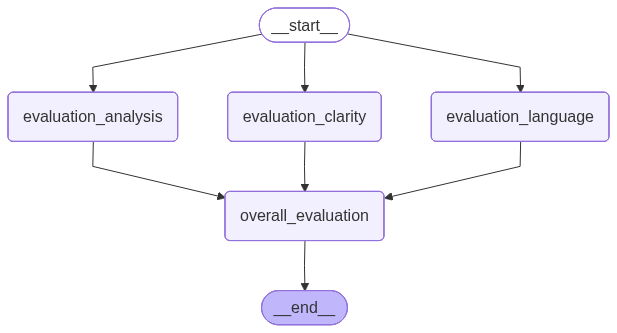

In [39]:
workflow

In [40]:
initial_state = {"essay": essay}


In [41]:
workflow.invoke(initial_state)

{'essay': 'The Role of Artificial Intelligence (AI) in Bangladesh\nIntroduction\n\nArtificial Intelligence (AI) refers to technologies that allow machines or software to perform tasks which typically require human intelligence — such as learning, reasoning, perception, language understanding, planning, etc. Globally, AI is transforming how people live, work, and solve complex problems. In Bangladesh, AI is increasingly seen not just as a futuristic idea, but as a powerful tool that can drive development across many sectors. However, realizing AI’s full potential involves overcoming challenges in infrastructure, regulation, human capacity, and inclusion.\n\nCurrent State of AI in Bangladesh\n\nBangladesh has already taken several steps toward integrating AI into its national development agenda. Key strategic documents like the National Strategy for Artificial Intelligence (2020) reflect the government’s intent to harness AI in governance, industry, agriculture, healthcare, finance, educ